### Fixed hyperparameter

In [2]:
import joblib
import scipy
from assocplots.qqplot import *
# from qmplot import qqplot
import matplotlib.pyplot as plt
from scipy.stats import beta

In [3]:
def read_pval(path):
    pvals = []
    pvals_perm = []
    with open(path, 'rb') as f:
        data = joblib.load(f)
        for j, d in enumerate(data):
            if d[0] == None:
                continue
            pvals.append(d[0])
            pvals_perm.append(d[1])

    return pvals,pvals_perm

In [8]:
# path='./sim_M_50_known_kernel_100_beta_scan_all_153.pkl'
path='./sim_M_50_known_kernel_100_beta_100.pkl'
pvals,_ = read_pval(path)


/home/boyang1995/anaconda3/lib/python3.8/site-packages/assocplots/qqplot.py:69: RuntimeWarning: divide by zero encountered in log10
  plt.plot(-np.log10(q_th[:n_quantiles]), -np.log10(q_data[:n_quantiles]), '.', color=color[j], label=labels[j])
/home/boyang1995/anaconda3/lib/python3.8/site-packages/assocplots/qqplot.py:78: RuntimeWarning: divide by zero encountered in log10
  plt.fill_between(-np.log10(q_th), -np.log10(q_err[:,0]), -np.log10(q_err[:,1]), color=color[j], alpha=fill_dens[j], label='%1.3f CI'%alpha)


Text(0.5, 33.0, 'Expected $-log_{10}{(P)}$')

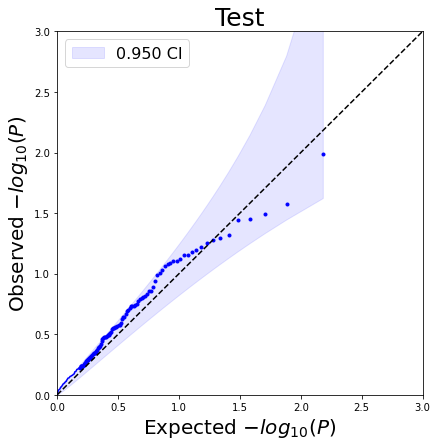

In [9]:
f, ax = plt.subplots(figsize=(6, 6), facecolor="w", edgecolor="k")
qqplot(
#     data=pvals,
        [pvals],
           [''],
           color=['b'], 
#            marker="o",
           title="Test",
#            xlabel=r"Expected $-log_{10}{(P)}$",
#            ylabel=r"Observed $-log_{10}{(P)}$",
#            dpi=300,
           distribution='beta',
#            figname="output_QQ_plot.png",
#            ax=ax
      )
plt.legend(prop={'size': 16},markerscale=2.)
plt.title(f'Test',size=25)
plt.ylabel(r"Observed $-log_{10}{(P)}$", size = 20, )
plt.xlabel(r"Expected $-log_{10}{(P)}$", size = 20, )

### Unknown hyperparameter

* When testing under multiple kernel hyperparameters, we select the minimum p-value among them. Then we use the permutation test to generate the null distribution. 

* We aggregate the permtutation statistics across all the testing sets to form the null distribution. This works well under the genome-wide sets testing. One underlying assumptions of it relies on the sets have similar structure so that the null statistics are exchangeable. To mimic it, we use a sliding overlapped window to create the annotation file.

* The unknown distribution is learned via beta distribution

* If you testing region are limted, and the sets are from independent, it is suggested generate each set's own null distribution with more number of permutation

#### Using permutation to lean the distribution

In [5]:
path='./sim_M_50_unknown_kernel_overlap_beta_more_999.pkl'
# path='/home/boyang1995/research/FastKAST_revise/FastKAST/small_results/small_M_50_unknown_kernel_overlap_more_2715.pkl'
min_pvals,pvals_perm = read_pval(path)
pvals_perm = np.array(pvals_perm).flatten()
min_pvals = np.array(min_pvals)

a1,b1,loc1,scale1 = beta.fit(pvals_perm, loc=0,scale=1)
pvals_correct = beta.cdf(min_pvals, a=a1, b=b1,loc=0, scale=1)
# pvals_correct = beta.cdf(min_pvals, a=a1, b=b1,loc=0, scale=1)

/home/boyang1995/anaconda3/lib/python3.8/site-packages/assocplots/qqplot.py:69: RuntimeWarning: divide by zero encountered in log10
  plt.plot(-np.log10(q_th[:n_quantiles]), -np.log10(q_data[:n_quantiles]), '.', color=color[j], label=labels[j])
/home/boyang1995/anaconda3/lib/python3.8/site-packages/assocplots/qqplot.py:78: RuntimeWarning: divide by zero encountered in log10
  plt.fill_between(-np.log10(q_th), -np.log10(q_err[:,0]), -np.log10(q_err[:,1]), color=color[j], alpha=fill_dens[j], label='%1.3f CI'%alpha)


Text(0.5, 33.0, 'Expected $-log_{10}{(P)}$')

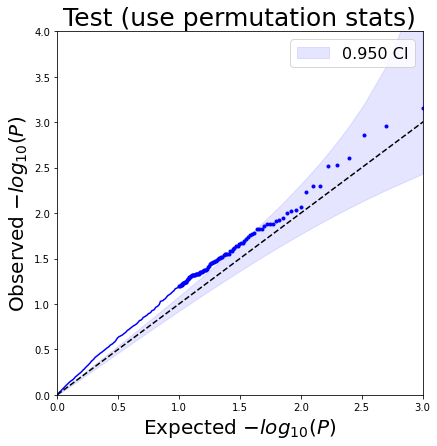

In [6]:
f, ax = plt.subplots(figsize=(6, 6), facecolor="w", edgecolor="k")
qqplot(
#     data=pvals,
        [pvals_correct],
           [''],
           color=['b'], 
#            marker="o",
           title="Test",
#            xlabel=r"Expected $-log_{10}{(P)}$",
#            ylabel=r"Observed $-log_{10}{(P)}$",
#            dpi=300,
           distribution='beta',
#            figname="output_QQ_plot.png",
#            ax=ax
      )
plt.legend(prop={'size': 16},markerscale=2.)
plt.title(f'Test (use permutation stats)',size=25)
plt.ylabel(r"Observed $-log_{10}{(P)}$", size = 20, )
plt.xlabel(r"Expected $-log_{10}{(P)}$", size = 20, )

#### Using observed statistics to learn the distribution

In [6]:
path='./sim_M_50_unknown_kernel_overlap_beta_more_999.pkl'
# path='/home/boyang1995/research/FastKAST_revise/FastKAST/small_results/small_M_50_unknown_kernel_overlap_more_2715.pkl'
min_pvals,pvals_perm = read_pval(path)
pvals_perm = np.array(pvals_perm).flatten()
min_pvals = np.array(min_pvals)

a1,b1,loc1,scale1 = beta.fit(min_pvals, loc=0,scale=1)
pvals_correct = beta.cdf(min_pvals, a=a1, b=b1,loc=0, scale=1)
# pvals_correct = beta.cdf(min_pvals, a=a1, b=b1,loc=0, scale=1)

/home/boyang1995/anaconda3/lib/python3.8/site-packages/assocplots/qqplot.py:69: RuntimeWarning: divide by zero encountered in log10
  plt.plot(-np.log10(q_th[:n_quantiles]), -np.log10(q_data[:n_quantiles]), '.', color=color[j], label=labels[j])
/home/boyang1995/anaconda3/lib/python3.8/site-packages/assocplots/qqplot.py:78: RuntimeWarning: divide by zero encountered in log10
  plt.fill_between(-np.log10(q_th), -np.log10(q_err[:,0]), -np.log10(q_err[:,1]), color=color[j], alpha=fill_dens[j], label='%1.3f CI'%alpha)


Text(0.5, 33.0, 'Expected $-log_{10}{(P)}$')

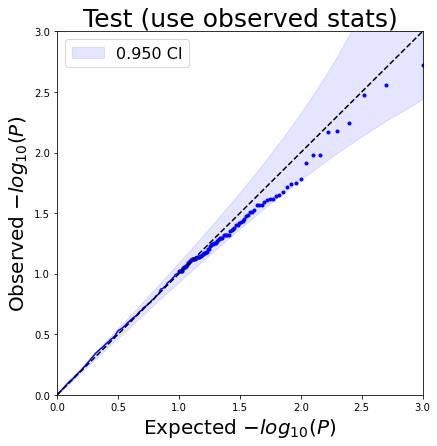

In [7]:
f, ax = plt.subplots(figsize=(6, 6), facecolor="w", edgecolor="k")
qqplot(
#     data=pvals,
        [pvals_correct],
           [''],
           color=['b'], 
#            marker="o",
           title="Test",
#            xlabel=r"Expected $-log_{10}{(P)}$",
#            ylabel=r"Observed $-log_{10}{(P)}$",
#            dpi=300,
           distribution='beta',
#            figname="output_QQ_plot.png",
#            ax=ax
      )
plt.legend(prop={'size': 16},markerscale=2.)
plt.title(f'Test (use observed stats)',size=25)
plt.ylabel(r"Observed $-log_{10}{(P)}$", size = 20, )
plt.xlabel(r"Expected $-log_{10}{(P)}$", size = 20, )